# Laboratorio 1
### Javier Ovalle, José Ángel Morales, Ricardo Morales; 22103, 22689, 22289
### Data Science
Link del repositorio: https://github.com/Saiyan-Javi/Lab1DS

Librerías a utilizar importadas de una vez al inicio del archivo:

In [38]:
from bs4 import BeautifulSoup
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale # Importar la librería locale para manejar el idioma
from scipy.stats import shapiro, normaltest # Para pruebas de normalidad


Análisis exploratorio de las importaciones de las gasolinas regular, super, diesel y gas de petroleo

Intentando cargar archivo Excel desde: C:\Users\javie\Documents\UVG\Cuarto año\Segundo Semestre\Data Science\Archivos Lab1\IMPORTACIONES.xlsx
Usando hoja: Hoja1
Columnas seleccionadas: ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior']
Columna de fecha: Fecha

Archivo de Excel cargado exitosamente.

Iniciando Análisis Exploratorio de Datos (EDA)

Columna 'Fecha' convertida a tipo: datetime64[ns]

Columnas seleccionadas para el análisis: ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior'] y Fecha

--- 1. Información General y Estadísticas Descriptivas ---

Información del DataFrame (primeras filas):

      Diesel  Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
0  566101.99            194065.738095         177776.50          373963.96   
1  489525.80            170703.380952         123115.99          243091.07   
2  575559.68            161837.371429         161726.42          312084.38   
3  437745.42            16

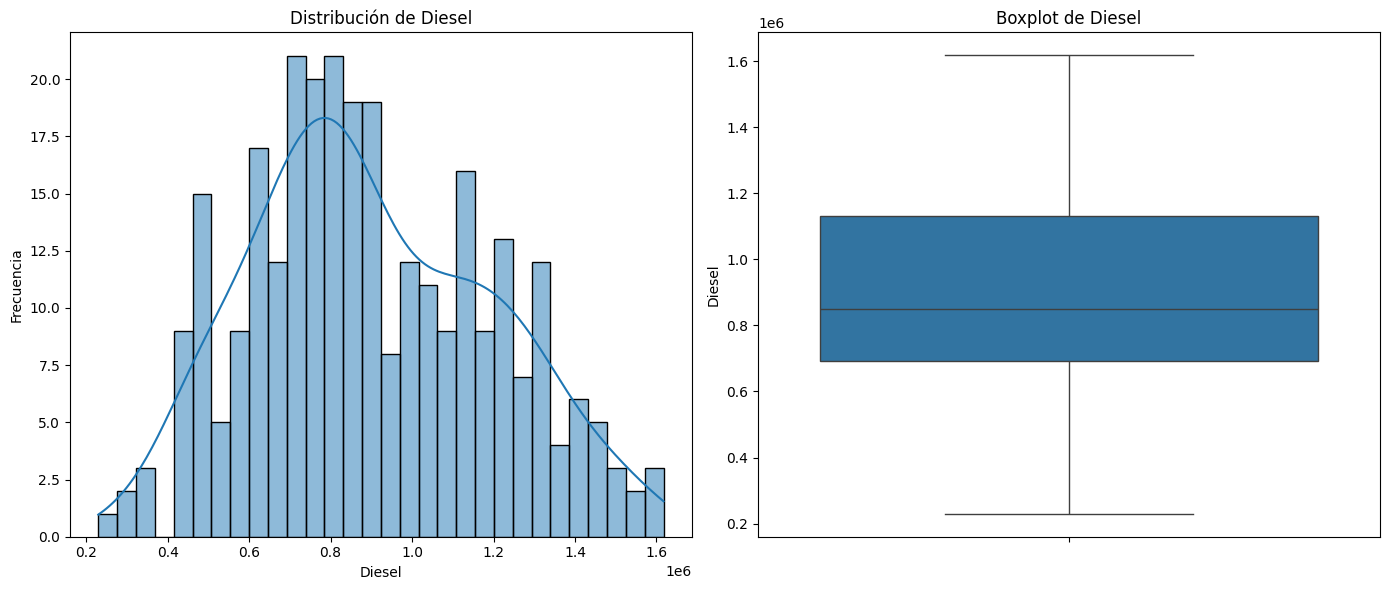

Estadísticas de Distribución para 'Diesel':
  - Media: 899560.96
  - Mediana: 850806.89
  - Desviación Estándar: 294522.86
  - Asimetría (Skewness): 0.28
  - Curtosis (Kurtosis): -0.61
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.983, p-valor: 0.001
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



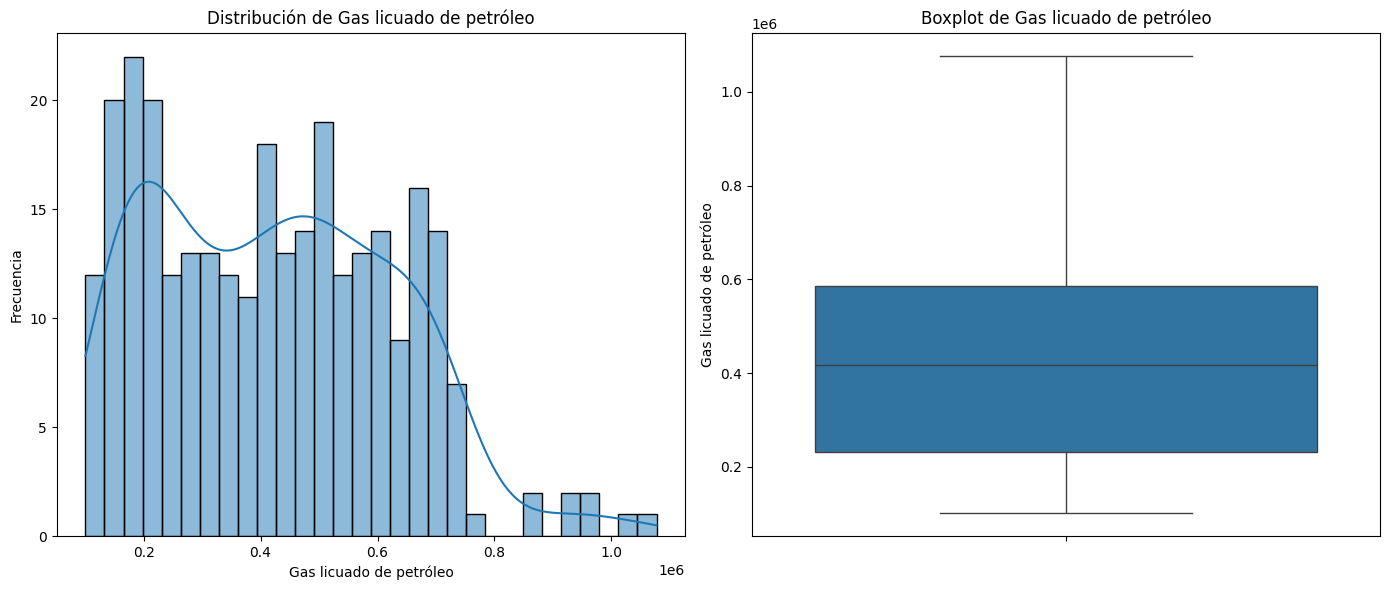

Estadísticas de Distribución para 'Gas licuado de petróleo':
  - Media: 422203.68
  - Mediana: 416068.30
  - Desviación Estándar: 205906.33
  - Asimetría (Skewness): 0.41
  - Curtosis (Kurtosis): -0.44
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.958, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



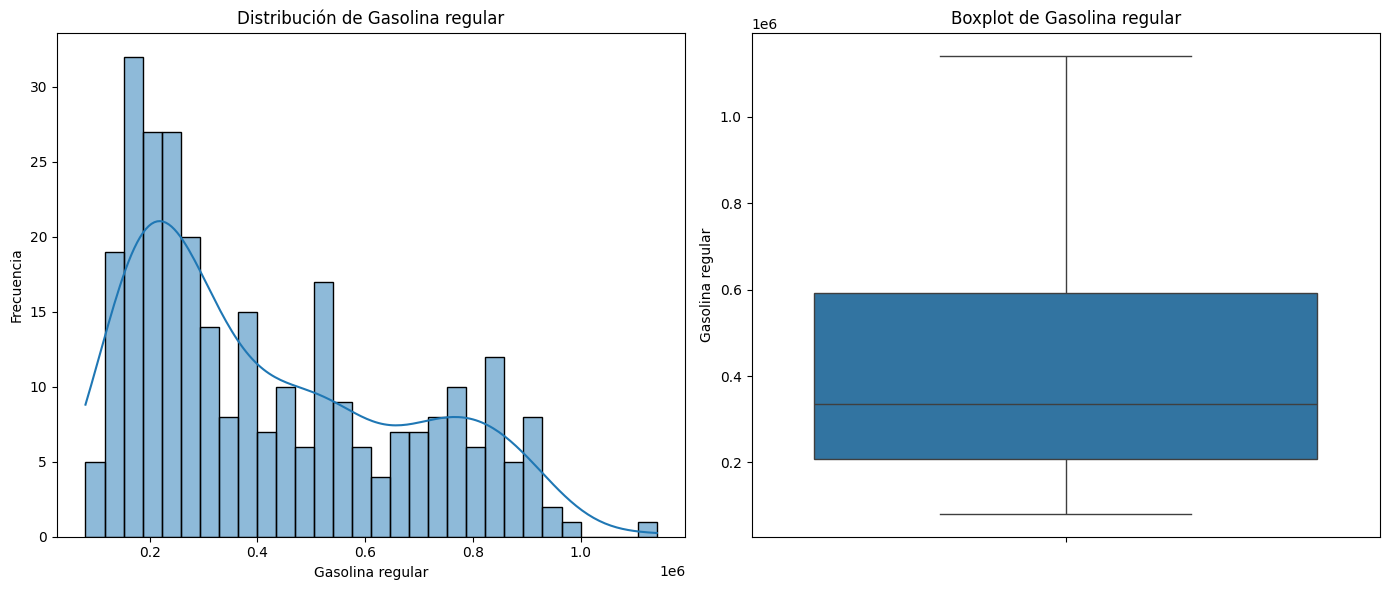

Estadísticas de Distribución para 'Gasolina regular':
  - Media: 419995.88
  - Mediana: 336005.72
  - Desviación Estándar: 247117.97
  - Asimetría (Skewness): 0.66
  - Curtosis (Kurtosis): -0.78
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.905, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



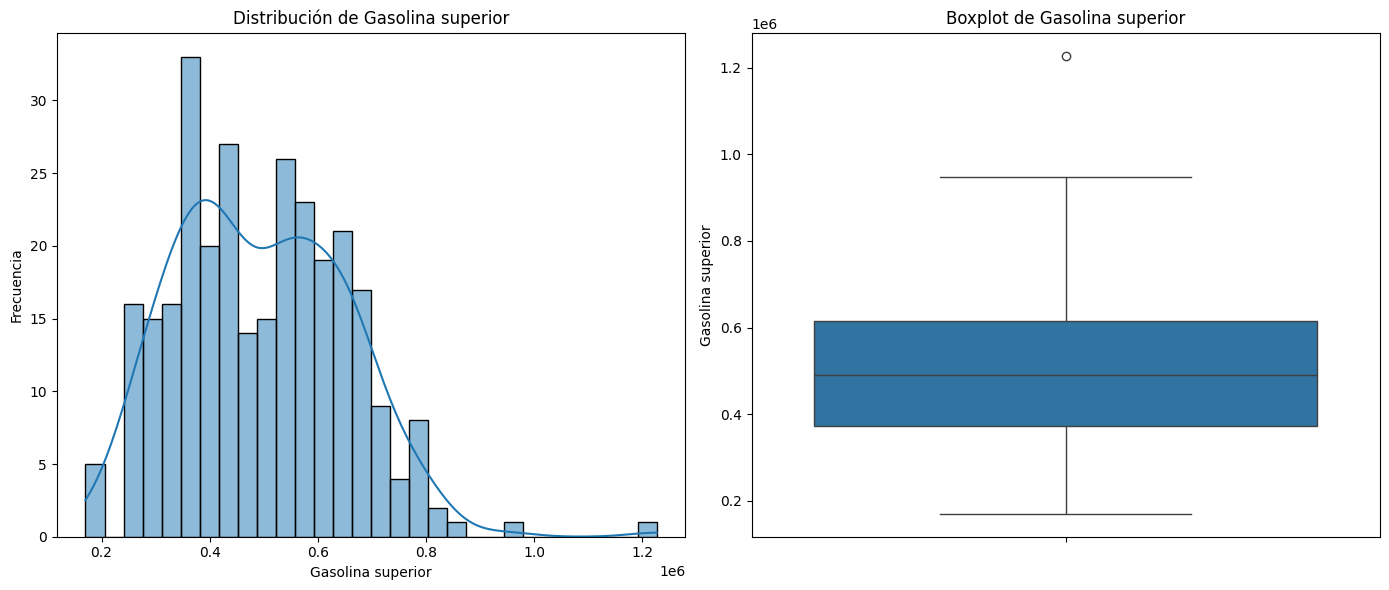

Estadísticas de Distribución para 'Gasolina superior':
  - Media: 494587.46
  - Mediana: 491194.71
  - Desviación Estándar: 157844.29
  - Asimetría (Skewness): 0.48
  - Curtosis (Kurtosis): 0.59
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.975, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------


----------------------------------------------------------------------

--- 3. Análisis de Correlación ---

Matriz de Correlación de Pearson:

                           Diesel  Gas licuado de petróleo  Gasolina regular  \
Diesel                   1.000000                 0.541365          0.737977   
Gas licuado de petróleo  0.541365                 1.000000          0.717743   
Gasolina regular         0.737977                 0.717743          1.000000   
Gasolina superior        0.650415                 0.568808          0.793780   


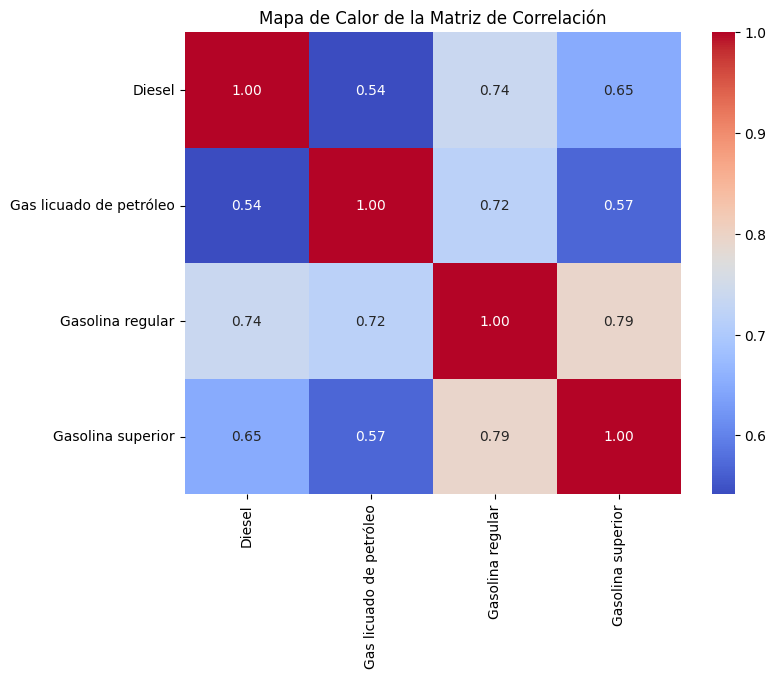

Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.

----------------------------------------------------------------------

--- 4. Análisis del Comportamiento Temporal (Anual) ---

Tendencia anual de importaciones (Picos por Año y Tipo de Combustible):



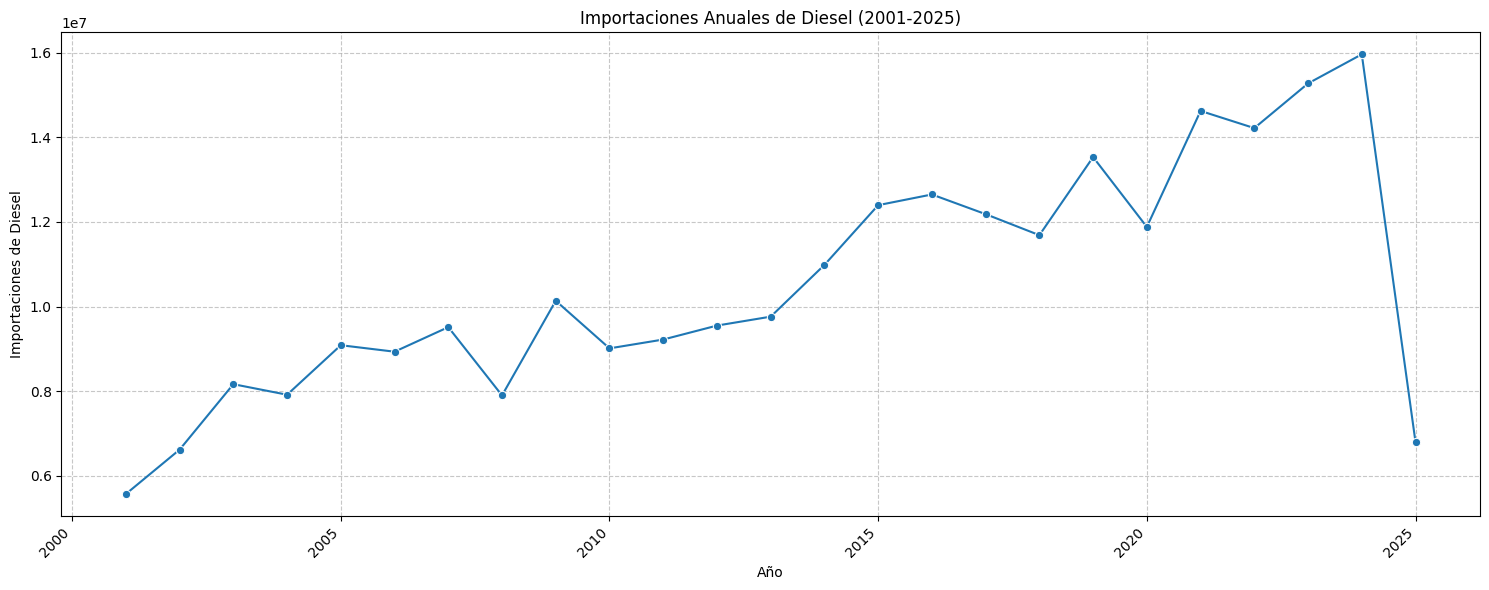

    - Pico anual para Diesel: 15964666.06 en el año 2024
    - Valle anual para Diesel: 5567077.54 en el año 2001



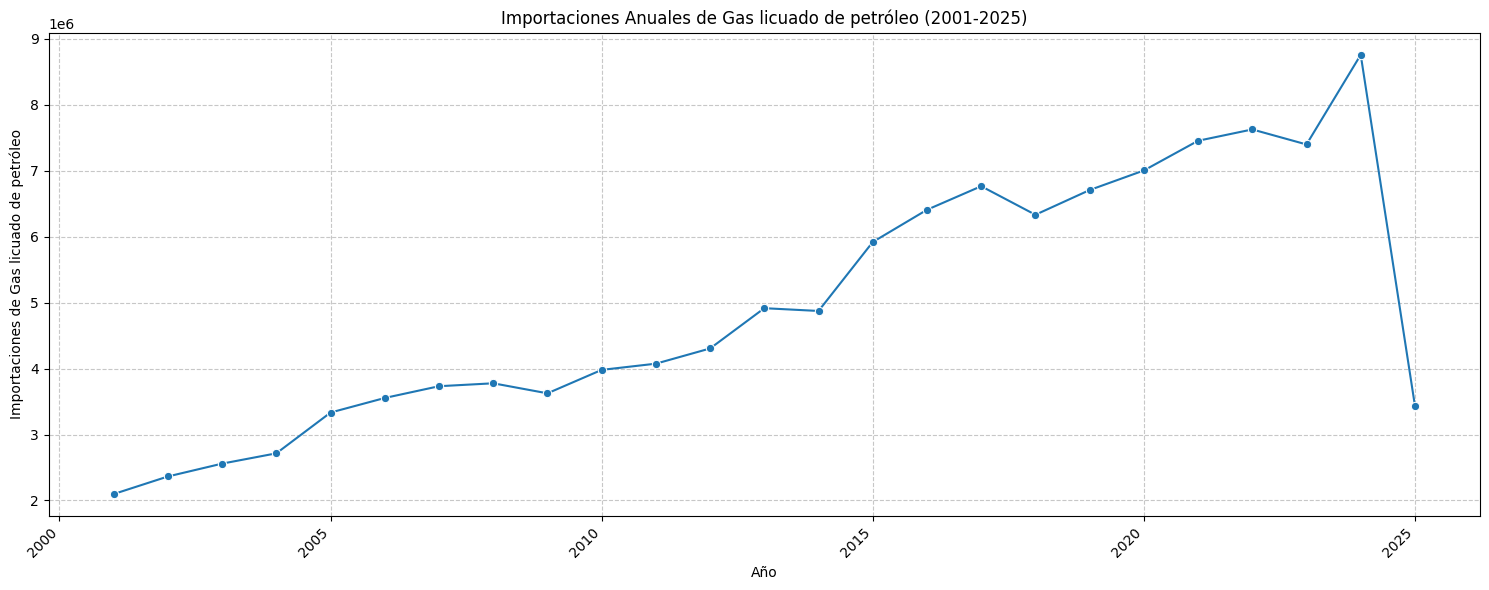

    - Pico anual para Gas licuado de petróleo: 8757484.67 en el año 2024
    - Valle anual para Gas licuado de petróleo: 2097517.47 en el año 2001



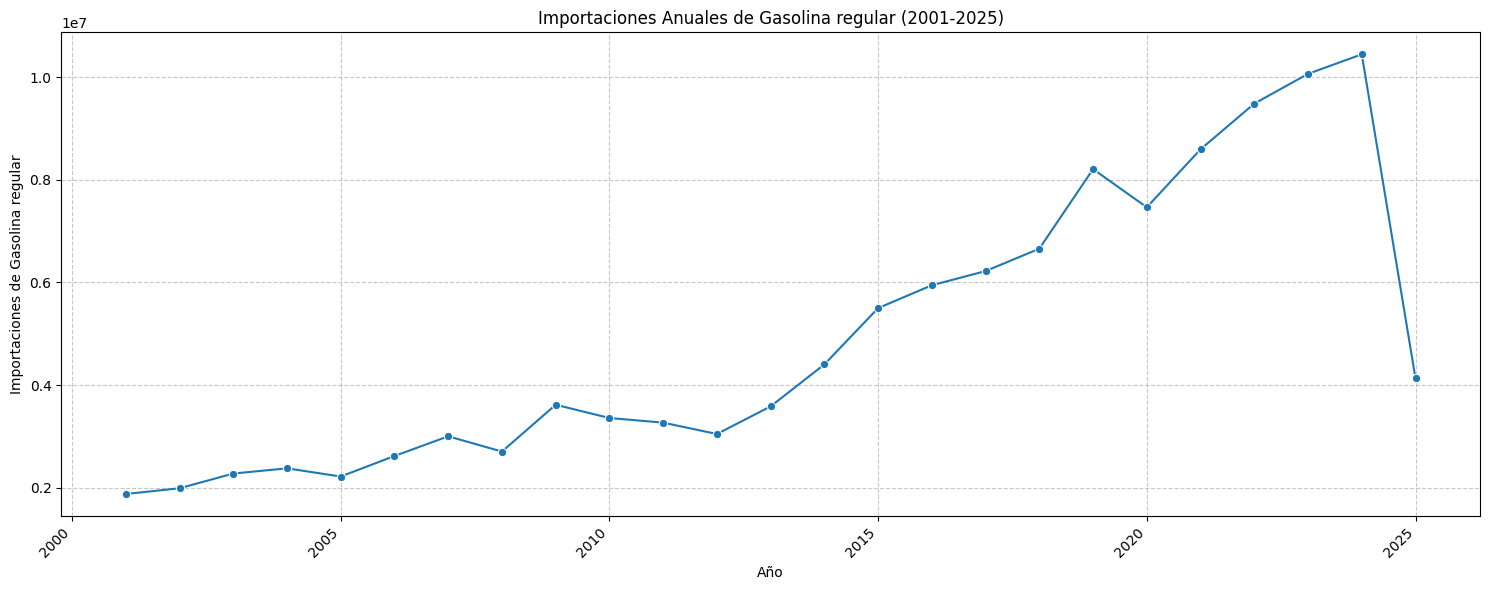

    - Pico anual para Gasolina regular: 10445583.73 en el año 2024
    - Valle anual para Gasolina regular: 1877504.23 en el año 2001



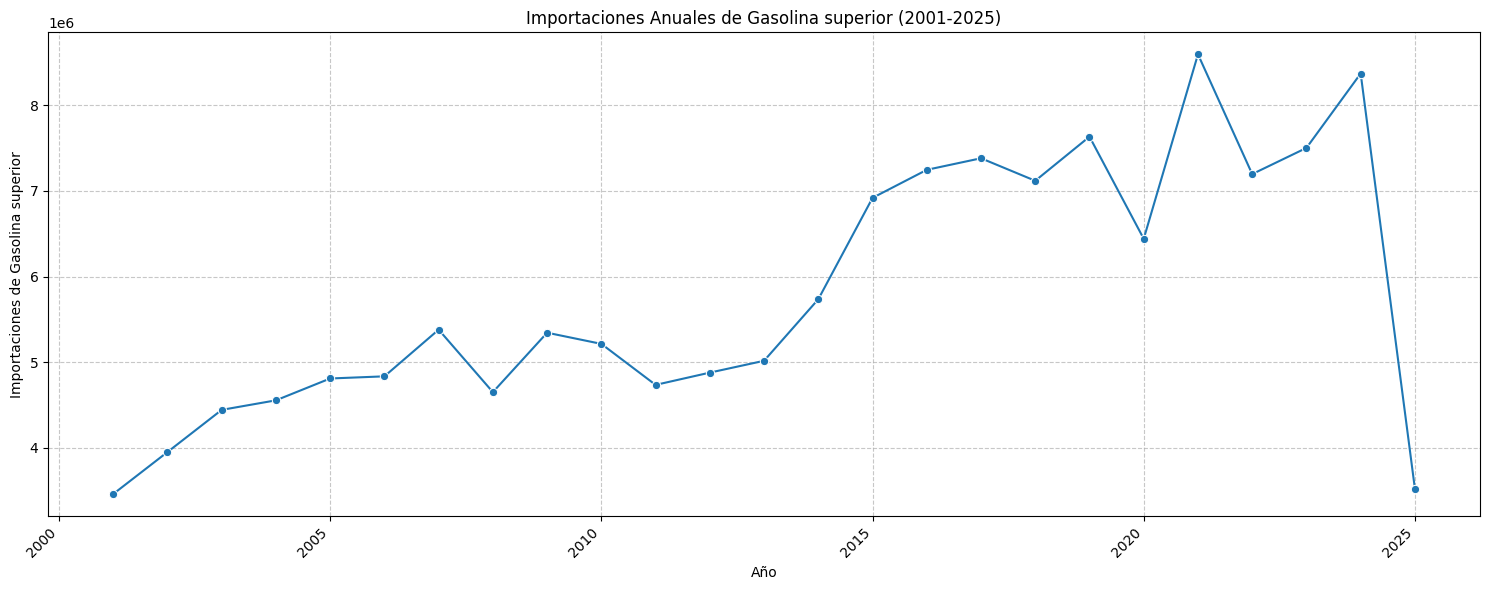

    - Pico anual para Gasolina superior: 8595855.05 en el año 2021
    - Valle anual para Gasolina superior: 3458874.87 en el año 2001


----------------------------------------------------------------------

--- 5. Análisis de Comportamiento en Períodos Específicos ---

Comportamiento en los Últimos 5 Años:

  Debug: Rango de años para 'últimos 5': 2021-2025
  Debug: Filas en df_ultimos_años: 53


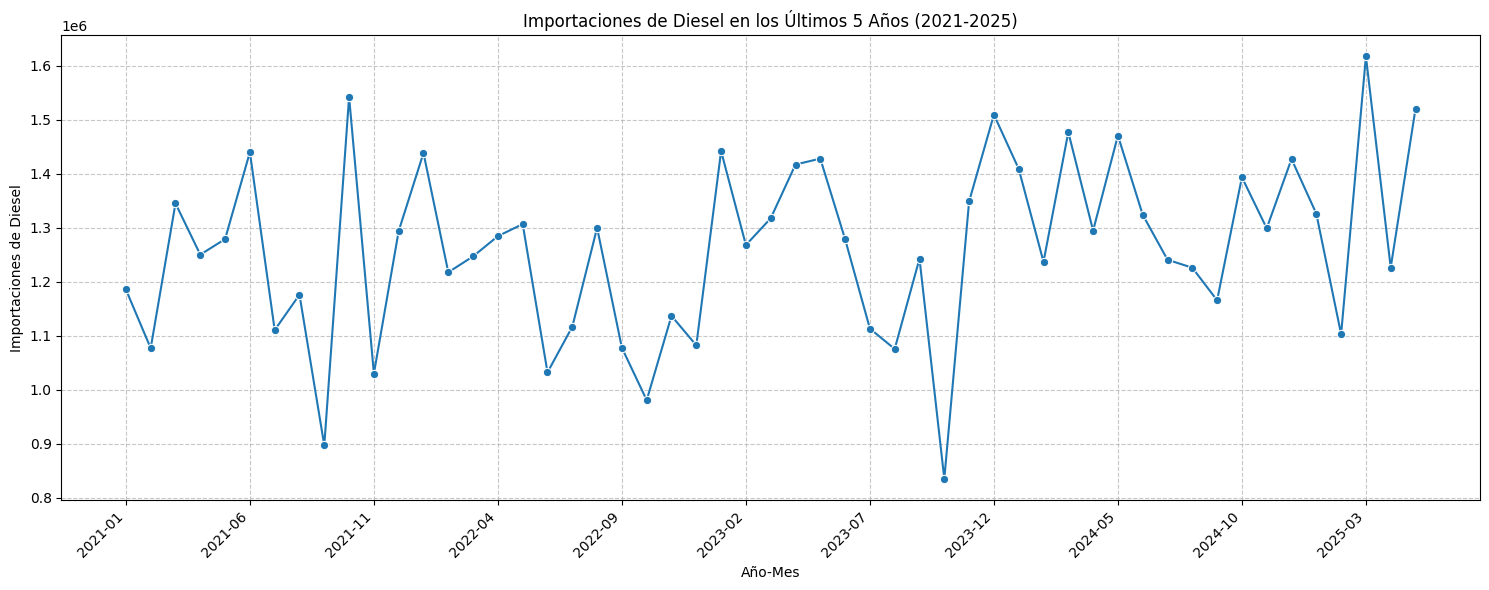

    - Tendencia de Diesel en los últimos 5 años.



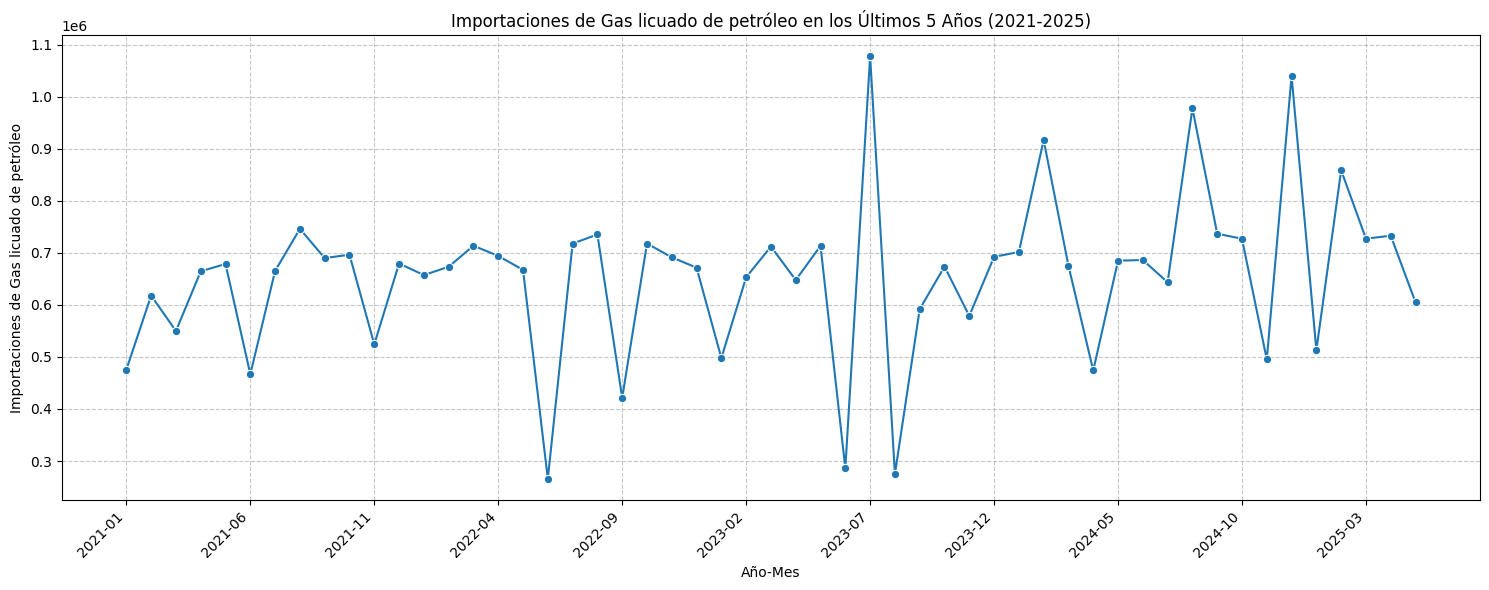

    - Tendencia de Gas licuado de petróleo en los últimos 5 años.



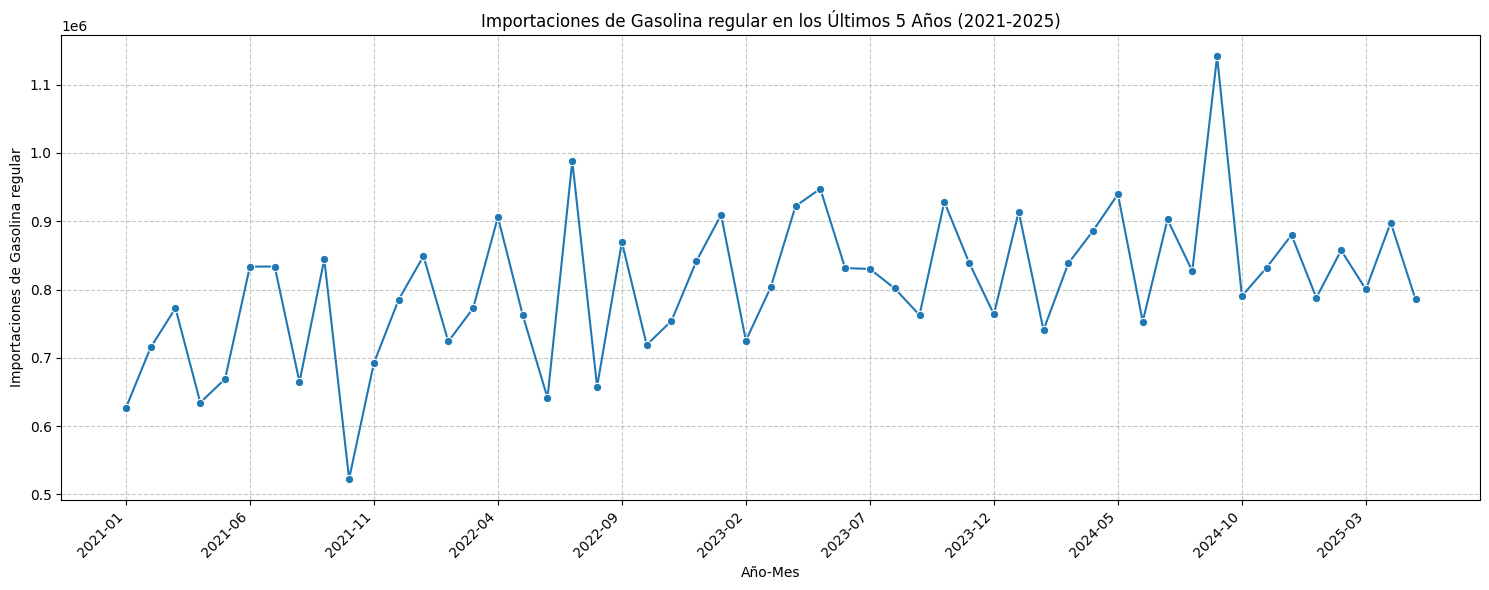

    - Tendencia de Gasolina regular en los últimos 5 años.



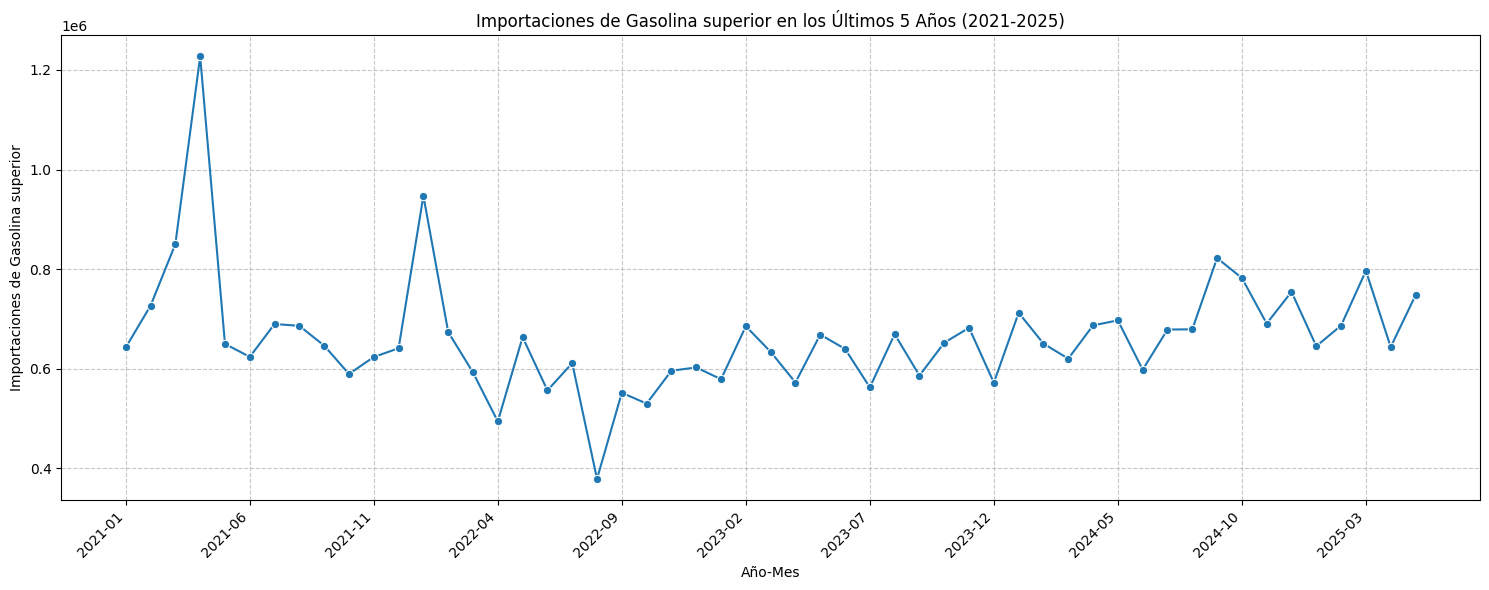

    - Tendencia de Gasolina superior en los últimos 5 años.


----------------------------------------------------------------------

Comportamiento Durante la Pandemia (2020-01 a 2021-12):

  Debug: Filas en df_pandemia: 24


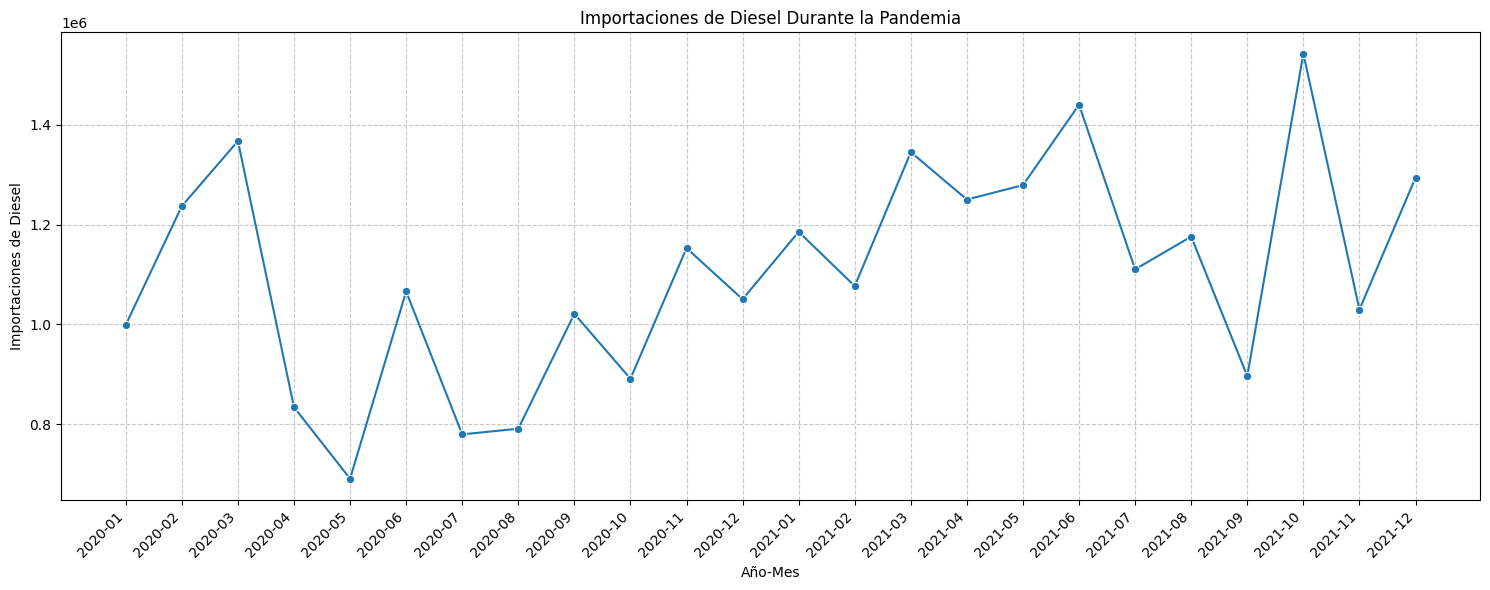

    - Tendencia de Diesel durante la pandemia. Media: 1104523.23



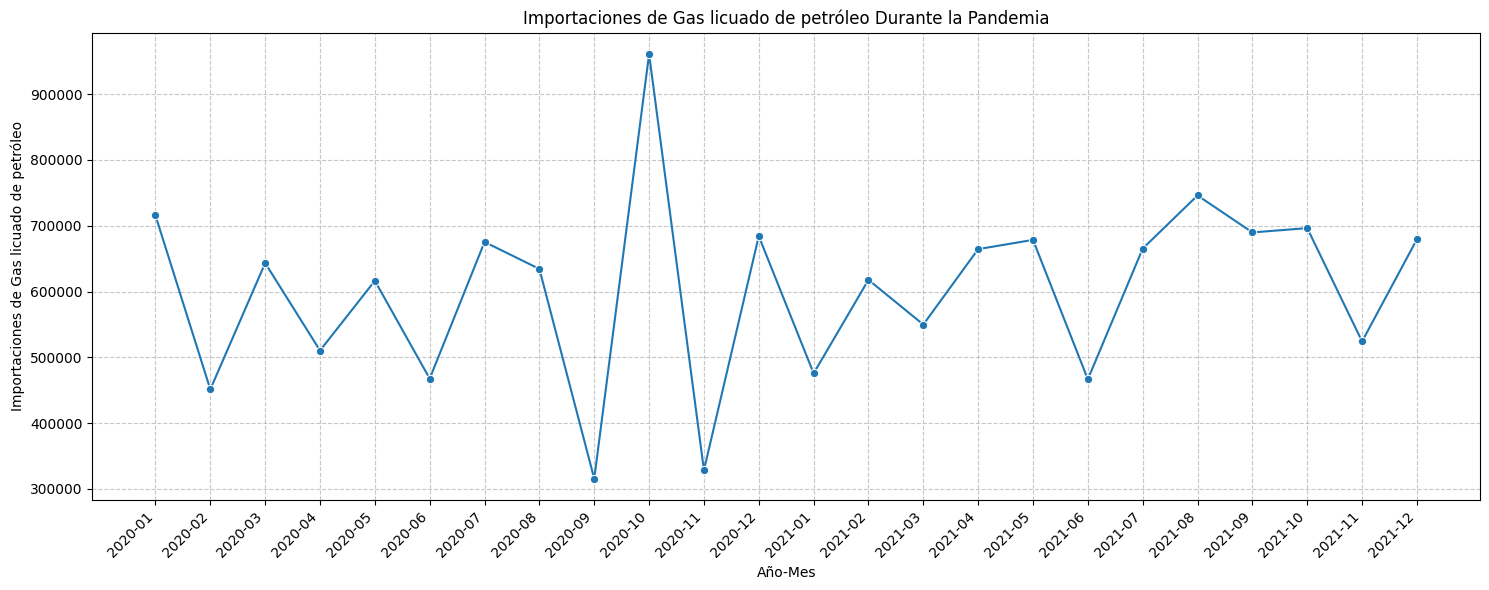

    - Tendencia de Gas licuado de petróleo durante la pandemia. Media: 602385.85



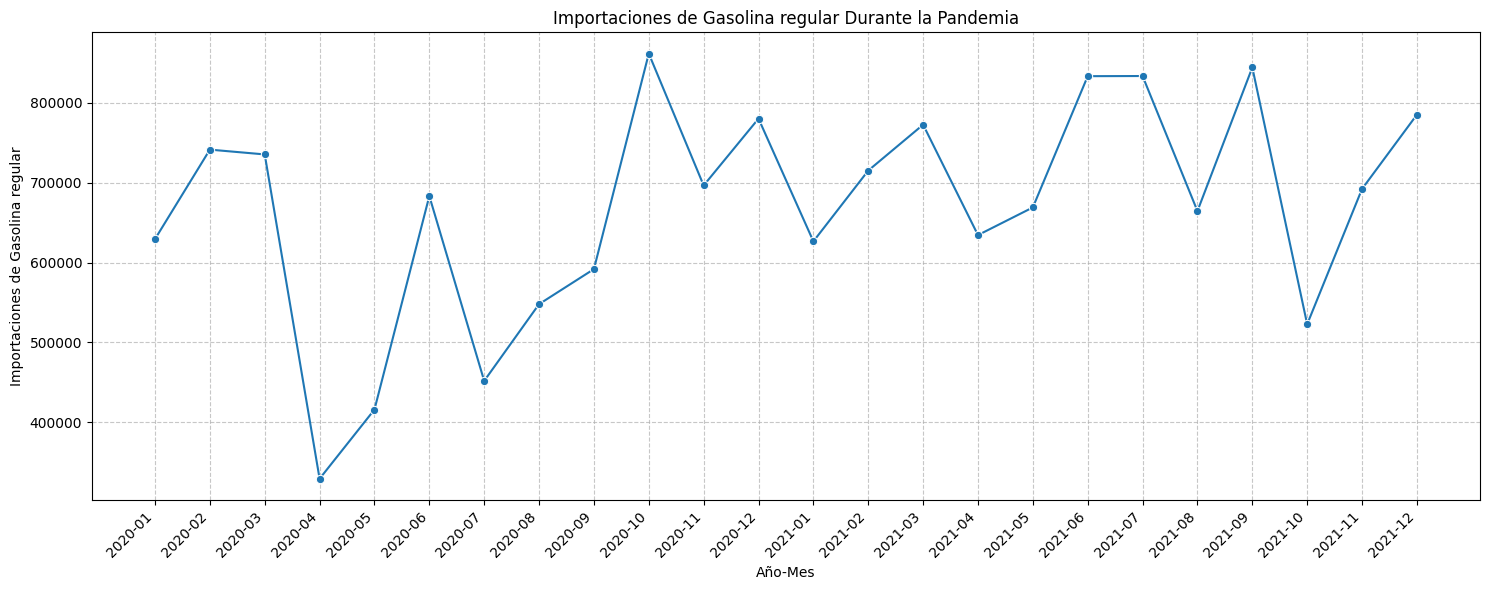

    - Tendencia de Gasolina regular durante la pandemia. Media: 669143.26



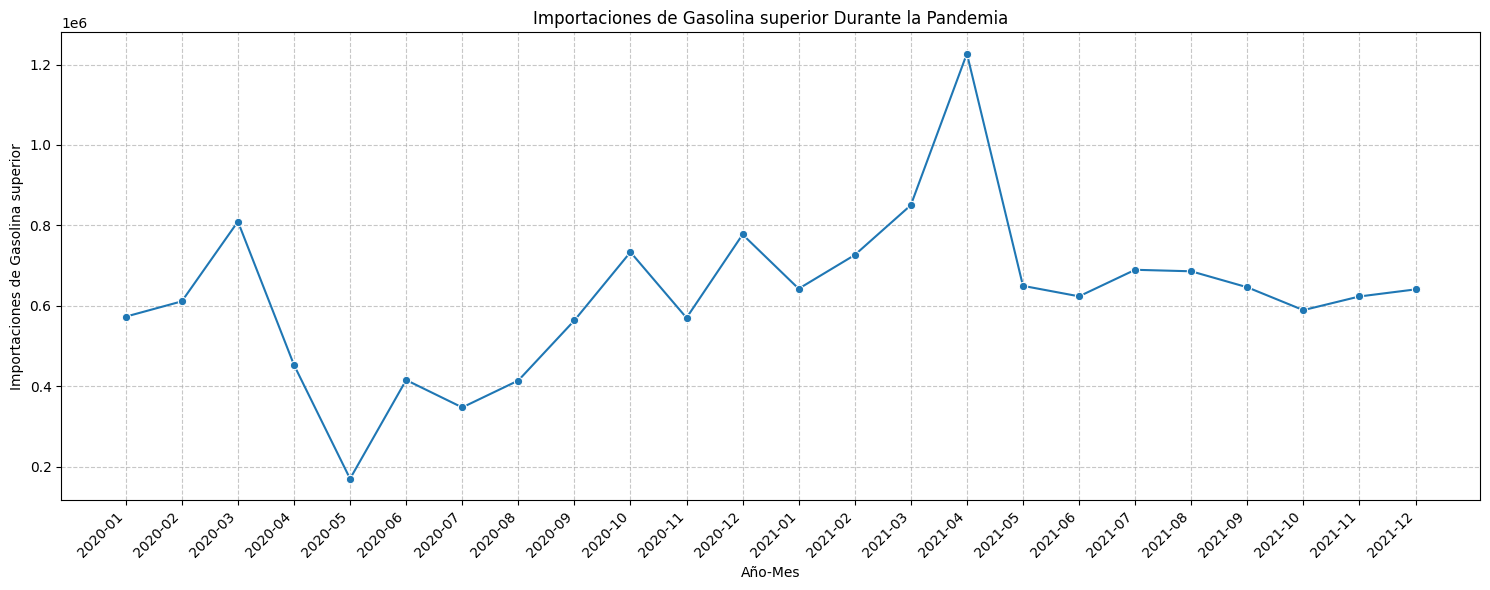

    - Tendencia de Gasolina superior durante la pandemia. Media: 626510.54


----------------------------------------------------------------------

Análisis Exploratorio de Datos completado. ¡Todos los puntos cubiertos!


In [40]:

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("Advertencia: No se pudo establecer la configuración regional en español para el manejo de fechas. "
                  "La conversión de fechas con nombres de mes ('ene', 'feb') podría fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")


def exploracion_eda(df, columnas_seleccionadas, columna_fecha):
    """
    Realiza un análisis exploratorio de datos (EDA) en columnas específicas de un DataFrame,
    incluyendo distribución, correlación, histogramas de fecha y análisis de requisitos específicos.

    Args:
        df (pd.DataFrame): El DataFrame de Pandas a analizar.
        columnas_seleccionadas (list): Una lista de las 4 columnas específicas a analizar (o más).
        columna_fecha (str): El nombre de la columna que contiene los datos de fecha.
    """

    print("Iniciando Análisis Exploratorio de Datos (EDA)\n")

    # Verificar que las columnas existan en el DataFrame
    for col in columnas_seleccionadas + [columna_fecha]:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no se encuentra en el DataFrame. Por favor, verifica los nombres.")
            return

    df_seleccionado = df[columnas_seleccionadas + [columna_fecha]].copy()

    # Convertir la columna de fecha a formato datetime
    try:
        df_seleccionado[columna_fecha] = pd.to_datetime(df_seleccionado[columna_fecha], format='%b/%Y')
        print(f"Columna '{columna_fecha}' convertida a tipo: {df_seleccionado[columna_fecha].dtype}\n")
    except Exception as e:
        print(f"Error CRÍTICO: No se pudo convertir la columna '{columna_fecha}' a datetime con el formato '%b/%Y'.")
        print(f"Mensaje de error: {e}")
        print("Asegúrate de que las fechas en tu Excel tengan el formato 'mes_abreviado/año' (ej. 'ene/2001') "
              "y que la configuración regional en español se haya aplicado correctamente.")
        return # Salir si la fecha no se puede convertir, ya que muchas partes dependen de ello

    print(f"Columnas seleccionadas para el análisis: {columnas_seleccionadas} y {columna_fecha}\n")

    # --- 1. Información General y Estadísticas Descriptivas ---
    print("--- 1. Información General y Estadísticas Descriptivas ---\n")
    print("Información del DataFrame (primeras filas):\n")
    print(df_seleccionado.head())
    print("\n")

    print("Estadísticas descriptivas de las columnas seleccionadas:\n")
    print(df_seleccionado[columnas_seleccionadas].describe().T)
    print("\n")

    print("Valores nulos por columna:\n")
    print(df_seleccionado[columnas_seleccionadas + [columna_fecha]].isnull().sum())
    print("\n" + "-"*70 + "\n")

    # --- 2. Análisis de Distribución (Histogramas, Boxplots y Pruebas de Normalidad) ---
    print("--- 2. Análisis de Distribución (Histogramas, Boxplots y Pruebas de Normalidad) ---\n")
    numeric_cols = df_seleccionado[columnas_seleccionadas].select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("No hay columnas numéricas continuas entre las seleccionadas para el análisis de distribución.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(14, 6))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df_seleccionado[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_seleccionado[col].dropna())
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()

            print(f"Estadísticas de Distribución para '{col}':")
            print(f"  - Media: {df_seleccionado[col].mean():.2f}")
            print(f"  - Mediana: {df_seleccionado[col].median():.2f}")
            print(f"  - Desviación Estándar: {df_seleccionado[col].std():.2f}")
            print(f"  - Asimetría (Skewness): {df_seleccionado[col].skew():.2f}")
            print(f"  - Curtosis (Kurtosis): {df_seleccionado[col].kurtosis():.2f}")

            # Prueba de normalidad (Shapiro-Wilk para N < 5000, D'Agostino-Pearson para N >= 20)
            data_to_test = df_seleccionado[col].dropna()
            if len(data_to_test) >= 20: # Tamaño mínimo para las pruebas
                if len(data_to_test) < 5000:
                    try:
                        stat, p = shapiro(data_to_test)
                        test_name = "Shapiro-Wilk"
                    except Exception as test_e:
                        print(f"  - Error al ejecutar Shapiro-Wilk: {test_e}. Intentando D'Agostino-Pearson.")
                        stat, p = normaltest(data_to_test)
                        test_name = "D'Agostino-Pearson"
                else:
                    stat, p = normaltest(data_to_test) # D'Agostino-Pearson
                    test_name = "D'Agostino-Pearson"

                print(f"  - Prueba de Normalidad ({test_name}):")
                print(f"    - Estadística: {stat:.3f}, p-valor: {p:.3f}")
                alpha = 0.05
                if p > alpha:
                    print(f"    - Con un nivel de significancia de {alpha}, no se puede rechazar la hipótesis nula (los datos parecen normales).")
                else:
                    print(f"    - Con un nivel de significancia de {alpha}, se rechaza la hipótesis nula (los datos NO parecen normales).")
            else:
                print("  - No hay suficientes datos para realizar una prueba de normalidad formal (se necesitan al menos 20 observaciones).")

            print("-" * 70 + "\n")
    print("\n" + "-"*70 + "\n")

    # --- 3. Análisis de Correlación (entre columnas numéricas) ---
    print("--- 3. Análisis de Correlación ---\n")
    if len(numeric_cols) > 1:
        corr_matrix = df_seleccionado[numeric_cols].corr()
        print("Matriz de Correlación de Pearson:\n")
        print(corr_matrix)
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de la Matriz de Correlación')
        plt.show()
        print("Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.")
    else:
        print("Se necesitan al menos dos columnas numéricas para calcular la correlación.")
    print("\n" + "-"*70 + "\n")

    # --- 4. Comportamiento Temporal (Agrupado por Año y Mes Estacional) ---
    print(f"--- 4. Análisis del Comportamiento Temporal (Anual) ---\n")
    if not numeric_cols:
        print(f"No hay columnas numéricas continuas para graficar con '{columna_fecha}'.")
    elif not pd.api.types.is_datetime64_any_dtype(df_seleccionado[columna_fecha]):
        print(f"La columna '{columna_fecha}' no es un tipo de dato datetime válido. No se puede generar la tendencia temporal.")
        return # *** AÑADIDO: Si la fecha no es datetime, salimos de esta sección. ***
    else:
        # Agregación anual para picos anuales
        df_seleccionado['año'] = df_seleccionado[columna_fecha].dt.year
        # Es mejor usar .sum() para importaciones totales anuales
        df_anual = df_seleccionado.groupby('año')[numeric_cols].sum().reset_index()

        print("Tendencia anual de importaciones (Picos por Año y Tipo de Combustible):\n")
        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_anual['año'], y=df_anual[col], marker='o')
            plt.title(f'Importaciones Anuales de {col} ({df_anual["año"].min()}-{df_anual["año"].max()})')
            plt.xlabel('Año')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Manejo de casos donde idxmax/idxmin podrían devolver NaN si la columna tiene solo NaNs
            if not df_anual[col].isnull().all():
                max_anual = df_anual.loc[df_anual[col].idxmax()]
                min_anual = df_anual.loc[df_anual[col].idxmin()]
                print(f"    - Pico anual para {col}: {max_anual[col]:.2f} en el año {int(max_anual['año'])}")
                print(f"    - Valle anual para {col}: {min_anual[col]:.2f} en el año {int(min_anual['año'])}\n")
            else:
                print(f"    - No hay datos válidos para {col} en el análisis anual.\n")
        print("\n" + "-"*70 + "\n")


    # --- 5. Comportamiento en los últimos X años y durante la Pandemia ---
    print("--- 5. Análisis de Comportamiento en Períodos Específicos ---\n")

    # Asegurarse de que 'año' esté presente antes de usarlo en esta sección
    if 'año' not in df_seleccionado.columns:
        df_seleccionado['año'] = df_seleccionado[columna_fecha].dt.year

    # Comportamiento en los últimos X años
    años_recientes = 5 # Puedes ajustar este valor si quieres ver más o menos años
    print(f"Comportamiento en los Últimos {años_recientes} Años:\n")
    
    año_actual = df_seleccionado['año'].max() # Usar la columna 'año' ya creada
    año_inicio_reciente = año_actual - años_recientes + 1
    
    df_ultimos_años = df_seleccionado[df_seleccionado['año'] >= año_inicio_reciente].copy()

    print(f"  Debug: Rango de años para 'últimos {años_recientes}': {año_inicio_reciente}-{año_actual}")
    print(f"  Debug: Filas en df_ultimos_años: {len(df_ultimos_años)}")

    if not df_ultimos_años.empty:
        df_ultimos_años['año_mes'] = df_ultimos_años[columna_fecha].dt.to_period('M')
        df_ultimos_años = df_ultimos_años.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_ultimos_años['año_mes'].astype(str), y=df_ultimos_años[col], marker='o')
            plt.title(f'Importaciones de {col} en los Últimos {años_recientes} Años ({año_inicio_reciente}-{año_actual})')
            plt.xlabel('Año-Mes')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            # Ajustar ticks del eje X para que no se superpongan si hay muchos meses
            unique_months_in_period = df_ultimos_años['año_mes'].unique()
            if len(unique_months_in_period) > 12 * 2: # Si hay más de 24 meses, reducir ticks
                 plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) # Mostrar 12 ticks máximo
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} en los últimos {años_recientes} años.\n")
    else:
        print(f"    - No hay datos disponibles para los últimos {años_recientes} años "
              f"({año_inicio_reciente}-{año_actual}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    # Comportamiento durante la pandemia
    # Definir el período de la pandemia. Puedes ajustarlo si es necesario.
    fecha_inicio_pandemia = pd.to_datetime('2020-01-01')
    fecha_fin_pandemia = pd.to_datetime('2021-12-31')

    df_pandemia = df_seleccionado[(df_seleccionado[columna_fecha] >= fecha_inicio_pandemia) &
                                  (df_seleccionado[columna_fecha] <= fecha_fin_pandemia)].copy()

    print(f"Comportamiento Durante la Pandemia ({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}):\n")
    print(f"  Debug: Filas en df_pandemia: {len(df_pandemia)}")

    if not df_pandemia.empty:
        df_pandemia['año_mes'] = df_pandemia[columna_fecha].dt.to_period('M')
        df_pandemia = df_pandemia.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_pandemia['año_mes'].astype(str), y=df_pandemia[col], marker='o')
            plt.title(f'Importaciones de {col} Durante la Pandemia')
            plt.xlabel('Año-Mes')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} durante la pandemia. Media: {df_pandemia[col].mean():.2f}\n")
    else:
        print(f"    - No hay datos disponibles para el período de la pandemia especificado "
              f"({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    print("Análisis Exploratorio de Datos completado. ¡Todos los puntos cubiertos!")

# --- BLOQUE PRINCIPAL PARA CARGAR Y EJECUTAR EL ANÁLISIS ---
if __name__ == '__main__':
    # --- CONFIGURACIÓN PARA TU ARCHIVO DE EXCEL ---
    # 1. **Ruta del Archivo de Excel:** Reemplaza con la ruta completa a tu archivo.
    #    En Windows, usa barras invertidas dobles (\\) o barras diagonales (/).
    ruta_archivo_excel = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Segundo Semestre\\Data Science\\Archivos Lab1\\IMPORTACIONES.xlsx"

    # 2. **Nombre de la Hoja:** Si tus datos no están en la primera hoja.
    nombre_hoja_excel = 'Hoja1'

    # 3. **Columnas a Analizar:** Los nombres EXACTOS de tus columnas numéricas.
    mis_columnas_a_analizar = ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior']

    # 4. **Columna de Fecha:** El nombre EXACTO de tu columna de fecha.
    mi_columna_fecha_excel = 'Fecha'

    print(f"Intentando cargar archivo Excel desde: {ruta_archivo_excel}")
    print(f"Usando hoja: {nombre_hoja_excel}")
    print(f"Columnas seleccionadas: {mis_columnas_a_analizar}")
    print(f"Columna de fecha: {mi_columna_fecha_excel}\n")

    try:
        df_desde_excel = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
        print("Archivo de Excel cargado exitosamente.\n")

        # Llamar a la función de análisis exploratorio
        exploracion_eda(df_desde_excel, mis_columnas_a_analizar, mi_columna_fecha_excel)

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo_excel}' no se encontró.")
        print("Por favor, verifica la ruta y el nombre del archivo.")
    except Exception as e:
        print(f"Ocurrió un error inesperado al cargar el archivo de Excel o durante el análisis: {e}")
        print("Asegúrate de que la ruta, el nombre de la hoja y los nombres de las columnas sean correctos.")